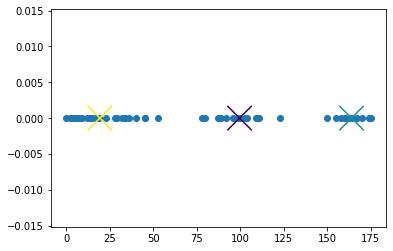

0
20771.08817204301


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

class kMeanClustering():
    
    # Intializing value
    def __init__(self, n_clusters=2 ):

        self.n_clusters= n_clusters
        self.data      = []
        self.centroids = []
        self.old_centroids = [0 for i in range(0,n_clusters)]
        self.clusters  = {i:[] for i in range(0,n_clusters) }
        
        
    # To calculate distance
    def distance(self, centroid, point):

        return abs(centroid - point)


    # To calculate lowest distance for finding cluster
    def find_index_of_min(self, li):

        lowest_index = 0
        lowest_value = li[0]

        for i in range(len(li)):

            if li[i] < lowest_value:
                lowest_value = li[i]
                lowest_index = i

        return lowest_index


    def change_in_centroids(self):

        max_difference = 0
        for i in range(self.n_clusters):

            try:
                difference = abs(self.old_centroids[i] - self.centroids[i]) / self.centroids[i]
            except:
                difference = 0

            if difference > max_difference:
                max_difference = difference

            percentage_change = max_difference * 100

        #print(percentage_change, self.centroids, self.old_centroids)
        return percentage_change


    def plot_cluster(self):

        #plotting points
        plt.scatter(self.data, [ 0  for i in self.data ])
        plt.scatter(self.centroids, [ 0  for i in self.centroids ], marker="x", s=600, c=[ i for i in range( self.n_clusters )])

        plt.show()

        
    # Fitting the model
    def fit(self, x):

        self.data = x

        #random cluster formation
        for i in range( self.n_clusters ):

            self.centroids.append( randint( min(data) , max(data) ) )

        while True:

            #Assigning points to new clusters
            for point in self.data:
                distance_from_centroids = []
                
                for one_centroid in self.centroids:
                    distance_from_centroids.append( self.distance(one_centroid, point) )

                #appending point to that cluster for which lowest distance was found
                point_in_cluster = self.find_index_of_min(distance_from_centroids)
                self.clusters[ point_in_cluster ].append( point )

            #Updating centroids:
            for i in range(0, self.n_clusters):

                self.old_centroids = [ i for i in self.centroids]
                total = 0
                
                for j in self.clusters[i]:
                    total = total + j

                try:
                    mean = total / len( self.clusters[i] )
                except:
                    mean = self.centroids[i]

                self.centroids[i] =  mean

            if self.change_in_centroids() < 1:
                break
        self.plot_cluster()


    #to predict one value only for now
    def predict(self, one_x):
        distance = []
        
        for i in self.centroids:
            distance.append(self.distance(i,one_x))
        
        min_distance = min(distance)
        for i in range(len(distance)):
            if min_distance == distance[i]:
                return i

    #WCSS value
    def score(self):
        score = 0
        score_value = [[] for i in range(self.n_clusters)]
        
        for i in range(self.n_clusters):
            total = 0
            for j in self.clusters[i]:
                total = total + (self.distance(self.centroids[i],j)**2)
            score_value[i].append(total)
        
        for i in score_value:
            score = score + i[0]
        
        return score


if __name__ == "__main__":

    data  = [5, 99, 88, 7, 45,  14, 29, 8, 6, 2, 34, 14, 12, 32, 104,
              17, 40, 19, 3, 80, 150, 175, 160, 53, 110, 0, 123, 36,
              17, 13, 8, 15, 28, 23, 78, 111, 3, 9, 45, 89, 34, 7, 160,
              165, 170, 155, 163, 174, 158, 167, 87, 92, 96, 100, 103, 109]

    x = data
    k     = 3
    model = kMeanClustering(k)

    model.fit(x)

    
    prediction = model.predict(67)
    print(prediction)
    
    score = model.score()

    print(score)
    